In [1]:
import os

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = './data'
data_df = pd.read_csv(os.path.join(data_path, 'data.csv'))

display(data_df)

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,TCGA_HT_8563,2.0,5.0,3,1.0,NaN,2.0,2,1.0,2.0,1.0,3.0,2.0,1.0,30.0,3.0,2.0,0.0
106,TCGA_HT_A5RC,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,1.0,2.0,1.0,70.0,3.0,2.0,1.0
107,TCGA_HT_A616,NaN,5.0,2,1.0,NaN,2.0,1,1.0,1.0,1.0,1.0,2.0,1.0,36.0,3.0,2.0,0.0
108,TCGA_HT_A61A,NaN,5.0,2,NaN,NaN,NaN,1,3.0,1.0,1.0,1.0,6.0,1.0,20.0,3.0,2.0,0.0


In [3]:

paths_df = {
    'Patient_ID': [],
    'Patient_Dir': [],
    'Files': [],
    'Full_Path': [],
}


for path in os.listdir(data_path):
    # skip files
    if path.find('.') != -1:
        continue

    for _path in os.listdir(os.path.join(data_path, path)):
        paths_df['Patient_ID'].append(path[:12])
        paths_df['Patient_Dir'].append(path)
        paths_df['Files'].append(_path)
        paths_df['Full_Path'].append(os.path.join(data_path, path, _path))


paths_df = pd.DataFrame(paths_df)
paths_df


,Patient_ID,Patient_Dir,Files,Full_Path
0,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_1.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
1,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_10.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
2,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_10_mask.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
3,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_11.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
4,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_11_mask.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
...,...,...,...,...
7853,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_88.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...
7854,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_88_mask.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...
7855,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_8_mask.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...
7856,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_9.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...


In [4]:
df_mri_scan = paths_df.loc[paths_df['Files'].str.find('_mask') == -1]
df_mri_sgmt = paths_df.loc[paths_df['Files'].str.find('_mask') != -1]

display(df_mri_scan.head())
display(df_mri_sgmt.head())

,Patient_ID,Patient_Dir,Files,Full_Path
0,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_1.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
1,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_10.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
3,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_11.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
5,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_12.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
7,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_13.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...


,Patient_ID,Patient_Dir,Files,Full_Path
2,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_10_mask.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
4,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_11_mask.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
6,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_12_mask.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
8,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_13_mask.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
10,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_14_mask.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...


In [5]:
# data_df.set_index('Patient', inplace=True)
# df_mri_scan.set_index('Patient_ID', inplace=True)

In [6]:
diagnoses = {
    'pos': 0,
    'neg': 0,
}

series = []

for row in df_mri_sgmt.iterrows():
    path = row[1]['Full_Path']
    mask = np.max(cv2.imread(path))
    if mask > 0:
        diagnoses['pos'] += 1
        series.append(1)
    elif mask == 0:
        diagnoses['neg'] += 1
        series.append(0)
    else:
        print('Fix dataset !!')

df_mri_scan = df_mri_scan.assign(Positive=pd.Series(series).values)
print(diagnoses)
df_mri_scan.head(1)

{'pos': 1373, 'neg': 2556}


,Patient_ID,Patient_Dir,Files,Full_Path,Positive
0,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_1.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,0


Diagnoses: 


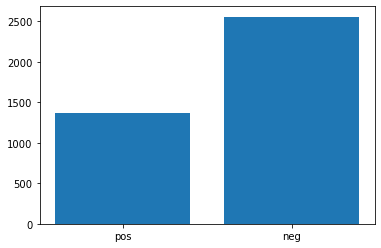

In [7]:
print('Diagnoses: ')
plt.bar(diagnoses.keys(), diagnoses.values())
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB4079A848>]],
      dtype=object)

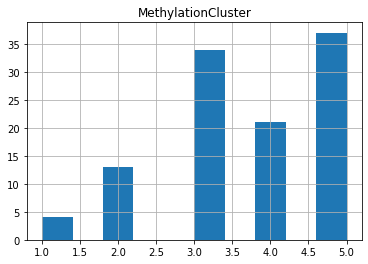

In [8]:
data_df.hist('MethylationCluster')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB408AF2C8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB408F9F08>]],
      dtype=object)

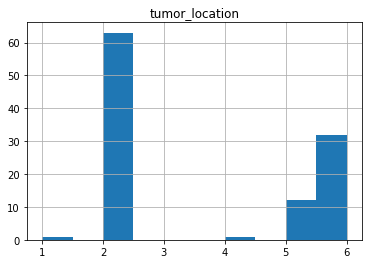

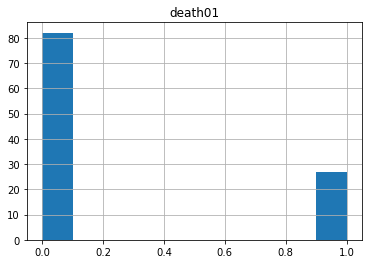

In [9]:
display(data_df.hist('tumor_location'))
display(data_df.hist('death01'))

In [10]:
display(data_df)
display(df_mri_scan)

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,TCGA_HT_8563,2.0,5.0,3,1.0,NaN,2.0,2,1.0,2.0,1.0,3.0,2.0,1.0,30.0,3.0,2.0,0.0
106,TCGA_HT_A5RC,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,1.0,2.0,1.0,70.0,3.0,2.0,1.0
107,TCGA_HT_A616,NaN,5.0,2,1.0,NaN,2.0,1,1.0,1.0,1.0,1.0,2.0,1.0,36.0,3.0,2.0,0.0
108,TCGA_HT_A61A,NaN,5.0,2,NaN,NaN,NaN,1,3.0,1.0,1.0,1.0,6.0,1.0,20.0,3.0,2.0,0.0


,Patient_ID,Patient_Dir,Files,Full_Path,Positive
0,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_1.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,0
1,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_10.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,1
3,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_11.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,1
5,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_12.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,1
7,TCGA_CS_4941,TCGA_CS_4941_19960909,TCGA_CS_4941_19960909_13.tif,./data\TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,1
...,...,...,...,...,...
7847,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_85.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0
7849,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_86.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0
7851,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_87.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0
7853,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_88.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0


In [11]:
pos_batch = df_mri_scan.loc[(df_mri_scan['Positive']==1)].sample(4)
neg_batch = df_mri_scan.loc[(df_mri_scan['Positive']==0)].sample(4)

display(pos_batch)
display(neg_batch)

,Patient_ID,Patient_Dir,Files,Full_Path,Positive
5720,TCGA_FG_A60K,TCGA_FG_A60K_20040224,TCGA_FG_A60K_20040224_4.tif,./data\TCGA_FG_A60K_20040224\TCGA_FG_A60K_2004...,1
1585,TCGA_DU_6400,TCGA_DU_6400_19830518,TCGA_DU_6400_19830518_32.tif,./data\TCGA_DU_6400_19830518\TCGA_DU_6400_1983...,1
7559,TCGA_HT_A61A,TCGA_HT_A61A_20000127,TCGA_HT_A61A_20000127_34.tif,./data\TCGA_HT_A61A_20000127\TCGA_HT_A61A_2000...,1
2561,TCGA_DU_7014,TCGA_DU_7014_19860618,TCGA_DU_7014_19860618_27.tif,./data\TCGA_DU_7014_19860618\TCGA_DU_7014_1986...,1


,Patient_ID,Patient_Dir,Files,Full_Path,Positive
7829,TCGA_HT_A61B,TCGA_HT_A61B_19991127,TCGA_HT_A61B_19991127_77.tif,./data\TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0
3573,TCGA_DU_8163,TCGA_DU_8163_19961119,TCGA_DU_8163_19961119_34.tif,./data\TCGA_DU_8163_19961119\TCGA_DU_8163_1996...,0
2297,TCGA_DU_7008,TCGA_DU_7008_19830723,TCGA_DU_7008_19830723_51.tif,./data\TCGA_DU_7008_19830723\TCGA_DU_7008_1983...,0
7450,TCGA_HT_A616,TCGA_HT_A616_19991226,TCGA_HT_A616_19991226_1.tif,./data\TCGA_HT_A616_19991226\TCGA_HT_A616_1999...,0


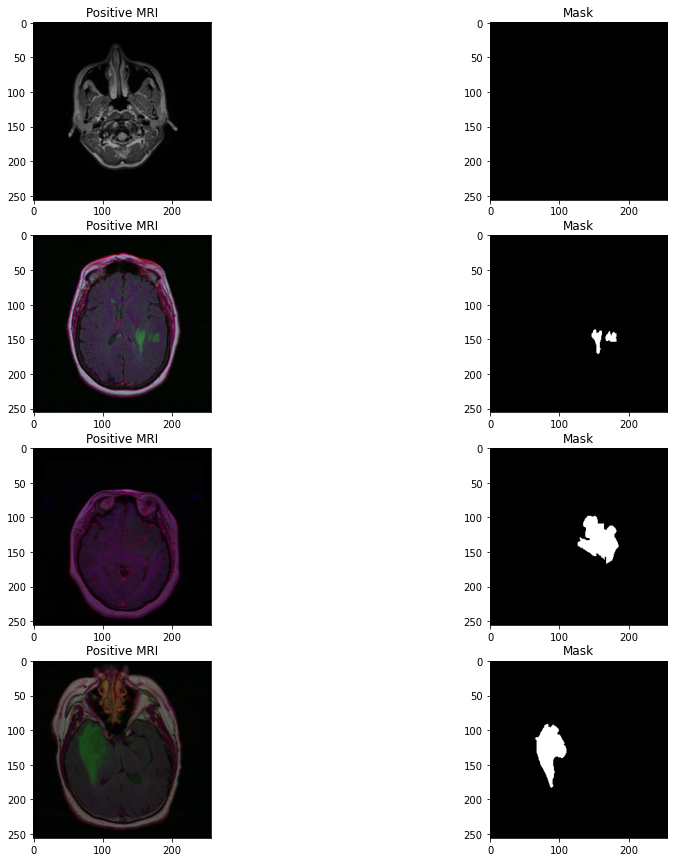

In [12]:
plt.rcParams['figure.figsize'] = (15., 15.)

for idx in range(0, 8, 2):
    img = pos_batch.iloc[int(idx / 2)]['Full_Path']
    mask = pos_batch.iloc[int(idx / 2)]['Full_Path'][:-4] + '_mask' + pos_batch.iloc[0]['Full_Path'][-4:]
    plt.subplot(4, 2, idx + 1)
    plt.title('Positive MRI')
    plt.imshow(cv2.imread(img))
    plt.subplot(4, 2, idx + 2)
    plt.title('Mask')
    plt.imshow(cv2.imread(mask))


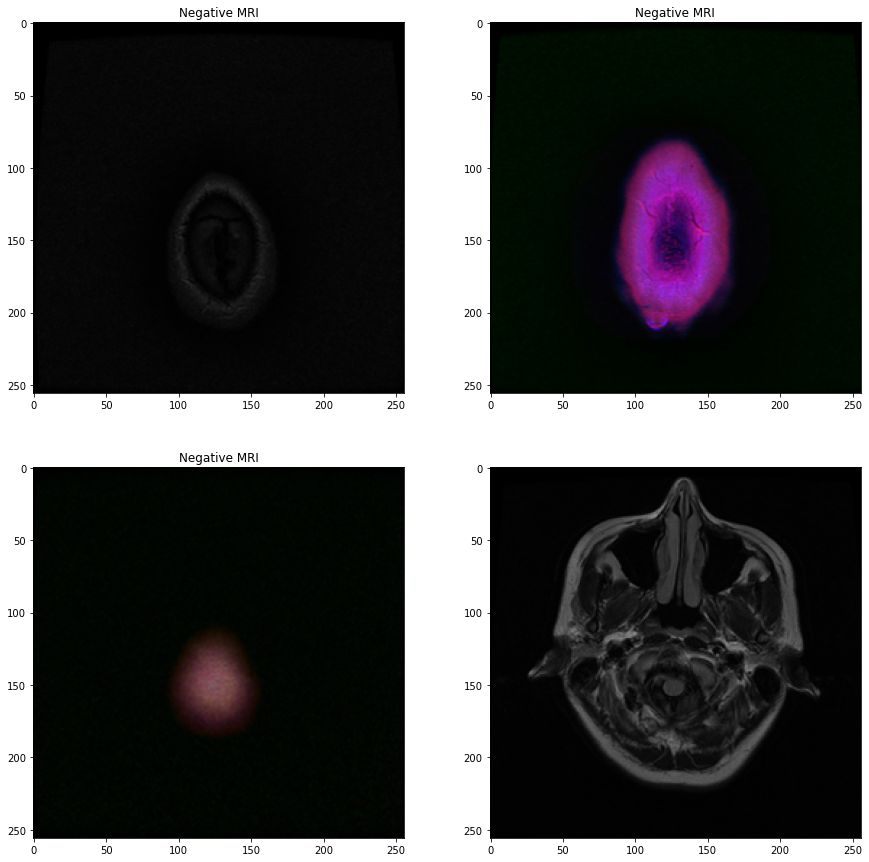

In [13]:
for idx in range(4):
    img = neg_batch.iloc[idx]['Full_Path']
    plt.title('Negative MRI')
    plt.subplot(2, 2, idx + 1)
    plt.imshow(cv2.imread(img))

